#### NLP 
* Natural Language Processing or NLP is an automated way to understand or analyze the natural languages and extract required information from such data by applying machine learning Algorithms.
* Some real-life example of NLP is IOS Siri, the Google assistant, Amazon echo.

#### A NLP pipeline consist of

 Any typical NLP problem can be proceeded as follows:

1. Text gathering(web scraping or available datasets)
2. Text cleaning(stemming, lemmatization, Removing accented characters)
3. Feature generation(Bag of words)
4. Embedding and sentence representation(word2vec)
5. Training the model by leveraging neural nets or regression techniques
6. Model evaluation
7. Making adjustments to the model
8. Deployment of the model.

#### Problem Description

* Customer support in channels like Twitter and Facebook has became a challenge because having a negative reviews or comments can largely impact the sales, profitability and customer experience.
* The main challenge in this line of research is collecting quality data.

#### Analytics Objective

*  To come up with a solution that can be utilized by users to correctly categorize tweets and counter them for better customer experience.
* Sentiment analysis of the each tweet.
* To identify the top customer support companies.

#### Dataset Description

The dataset is a csv, where each row is a tweet. Each conversation includes at least one customer request and one company reply.

* tweet_id:	A unique, anonymized ID for the Tweet. Referenced by response_tweet_id and in_response_to_tweet_id.
* author_id: A unique, anonymized user ID. In the dataset have been replaced with their associated anonymized user ID.
* inbound: Whether the tweet is "inbound" to a company doing customer support on Twitter. This feature is useful when re-organizing data for training conversational models.
* created_at: Date and time when the tweet was sent.
* text: Tweet content.
* response_tweet_id: IDs of tweets that are responses to this tweet.
* in_response_to_tweet_id: IDs of the tweet is in response to, if any.

#### Experiment

* To build a unsupervised machine learning model to correctly cluster the user tweets.

### 1.Data handling

#### Import requried libraries

In [1]:
import os
path = os.getcwd()

In [2]:
import pandas as pd
import numpy as np

#### Read the dataset

In [3]:
data = pd.read_csv('twcs.csv')

In [4]:
data.head(2)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0


#### Check the shape

In [5]:
data.shape

(2811774, 7)

In [6]:
data['text'][14]

"@115714 whenever I contact customer support, they tell me I have shortcode enabled on my account, but I have never in the 4 years I've tried https://t.co/0G98RtNxPK"

#### Checking Missing values

In [7]:
data.isnull().mean()

tweet_id                   0.000000
author_id                  0.000000
inbound                    0.000000
created_at                 0.000000
text                       0.000000
response_tweet_id          0.370097
in_response_to_tweet_id    0.282503
dtype: float64

#### Check the data type

In [8]:
data.dtypes

tweet_id                     int64
author_id                   object
inbound                       bool
created_at                  object
text                        object
response_tweet_id           object
in_response_to_tweet_id    float64
dtype: object

#### Feature Extraction

* we have information on the author of the tweets and whether the tweet was a query or a response (the "inbound" column). If the tweet was a query, the response_tweet_id gives the response made by the support team.

#### Some considerations:
* The inbound feature is important because it allows you to distinguish between company and customer.
* Obviously the 'text' function is the main source of information.

 I will apply natural language processing techniques. In my opinion, it is possible to address the problem in two ways:
 
1.Catalog customer tweets and identify the most discussed topics.

2.Create a model that adapts to the tweets of the companies and try to answer a specific topic of a customer (to do)

In [9]:
data.head(2)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0


* Here I create another dataset containing a client's initial request and the company's response.

In [10]:

first_inbound = data[pd.isnull(data.in_response_to_tweet_id) & data.inbound]

inbOutb = pd.merge(first_inbound, data, left_on='tweet_id', 
                                  right_on='in_response_to_tweet_id').sample(frac=1)

# Filter to only outbound replies (from companies)
inbOutb = inbOutb[inbOutb.inbound_y ^ True]

In [11]:
inbOutb.shape

(794299, 14)

In [12]:
inbOutb.head(2)

,tweet_id_x,author_id_x,inbound_x,created_at_x,text_x,response_tweet_id_x,in_response_to_tweet_id_x,tweet_id_y,author_id_y,inbound_y,created_at_y,text_y,response_tweet_id_y,in_response_to_tweet_id_y
299536,1096114,378651,True,Fri Oct 13 20:18:30 +0000 2017,@117249 @tesco do either of you sell sake? I'm...,1096112,NaN,1096112,Tesco,False,Fri Oct 13 21:26:20 +0000 2017,"@378651 Hi Skye, if you's like to DM me your p...",1096113,1096114.0
402609,1461905,459294,True,Thu Nov 02 17:31:45 +0000 2017,@O2 really disappointed with lack of support. ...,1461904,NaN,1461904,O2,False,Thu Nov 02 18:26:10 +0000 2017,"@459294 Hi Daniel, 😞 Please can you DM us some...",NaN,1461905.0


Now the dataset is doubled in size (features), as each line contains:

* a customer request (text_x)
* a reply from the company (text_y)

From which we can easily verify that:

* the 'inbound_x' feature is always True;
* the 'inbound_y' feature is always False;

#### Checking Missing values

In [13]:
inbOutb.isnull().mean()

tweet_id_x                   0.00000
author_id_x                  0.00000
inbound_x                    0.00000
created_at_x                 0.00000
text_x                       0.00000
response_tweet_id_x          0.00000
in_response_to_tweet_id_x    1.00000
tweet_id_y                   0.00000
author_id_y                  0.00000
inbound_y                    0.00000
created_at_y                 0.00000
text_y                       0.00000
response_tweet_id_y          0.66792
in_response_to_tweet_id_y    0.00000
dtype: float64

* The 'in_response_to_tweet_id_x' feature is totally composed of NaN, as the client's message is not a response to any tweets, because it is the beginning of the conversation. So this feature will be dropped.

#### Drop useless features

In [14]:
inbOutb.columns

Index(['tweet_id_x', 'author_id_x', 'inbound_x', 'created_at_x', 'text_x',
       'response_tweet_id_x', 'in_response_to_tweet_id_x', 'tweet_id_y',
       'author_id_y', 'inbound_y', 'created_at_y', 'text_y',
       'response_tweet_id_y', 'in_response_to_tweet_id_y'],
      dtype='object')

In [15]:
toDrop = ['tweet_id_x', 'inbound_x','response_tweet_id_x', 'in_response_to_tweet_id_x', 
          'tweet_id_y', 'inbound_y','response_tweet_id_y', 'in_response_to_tweet_id_y']

In [16]:
inbOutb.drop(toDrop, axis=1, inplace=True)
print('inbOutb shape: ', inbOutb.shape)

inbOutb shape:  (794299, 6)


In [17]:
inbOutb.head(2)

,author_id_x,created_at_x,text_x,author_id_y,created_at_y,text_y
299536,378651,Fri Oct 13 20:18:30 +0000 2017,@117249 @tesco do either of you sell sake? I'm...,Tesco,Fri Oct 13 21:26:20 +0000 2017,"@378651 Hi Skye, if you's like to DM me your p..."
402609,459294,Thu Nov 02 17:31:45 +0000 2017,@O2 really disappointed with lack of support. ...,O2,Thu Nov 02 18:26:10 +0000 2017,"@459294 Hi Daniel, 😞 Please can you DM us some..."


### 2.Data Visualization

In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

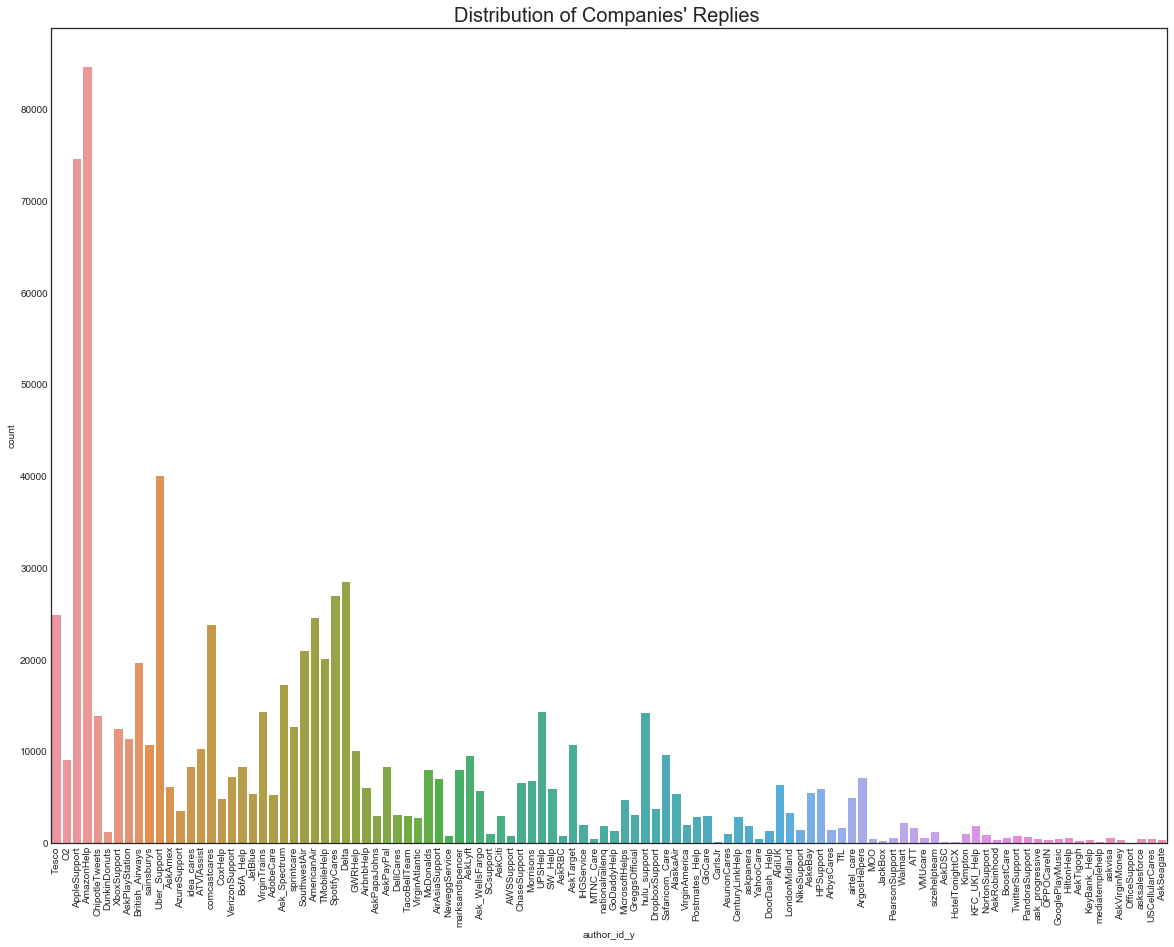

In [19]:
plt.figure(figsize=(20, 15))
sns.set_style('white')
sns.countplot(x='author_id_y', data=inbOutb )
plt.xticks(rotation = 90)
plt.title("Distribution of Companies' Replies ", fontsize = 20)
plt.show()

* The tweets refer to 108 different companies.
* The dataset has highest tweets for AmazonHelp followed by AppleSupport and Uber_support. 
* For a better analysis it is necessary to categorize the companies to select more specific tweets to the relative services.

In [20]:
author_grouped = inbOutb.groupby('author_id_y')

In [21]:
top_support_providers = set(author_grouped.agg('count')
                                .sort_values(['author_id_x'], ascending=[0])
                                .index[:20]
                                .values)

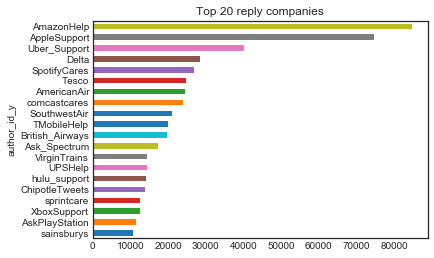

In [22]:
inbOutb \
    .loc[inbOutb.author_id_y.isin(top_support_providers)] \
    .groupby('author_id_y') \
    .author_id_x.count() \
    .sort_values() \
    .plot('barh', title='Top 20 reply companies')

In [23]:
# ! pip install twython

In [24]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm import tqdm_notebook

In [25]:
# Instantiate sentiment analyzer from NLTK, make helper function
sentiment_analyzer = SentimentIntensityAnalyzer()

def sentiment_for(text: str) -> float:
    return sentiment_analyzer.polarity_scores(text)['compound']

In [26]:
# Demonstration for sentiment analyzer
sentiment_for(" i will help you")

0.4019

In [27]:
# Analyze sentiment of inbound customer support requests
inbOutb['sentiment'] = \
     inbOutb.text_x.apply(sentiment_for)

In [28]:
inbOutb.head(2)

,author_id_x,created_at_x,text_x,author_id_y,created_at_y,text_y,sentiment
299536,378651,Fri Oct 13 20:18:30 +0000 2017,@117249 @tesco do either of you sell sake? I'm...,Tesco,Fri Oct 13 21:26:20 +0000 2017,"@378651 Hi Skye, if you's like to DM me your p...",0.0000
402609,459294,Thu Nov 02 17:31:45 +0000 2017,@O2 really disappointed with lack of support. ...,O2,Thu Nov 02 18:26:10 +0000 2017,"@459294 Hi Daniel, 😞 Please can you DM us some...",-0.0679


* Here sentiment column analysis the each row and gives value for each row.

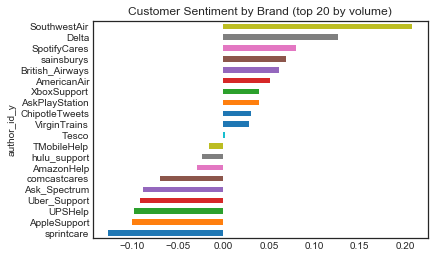

In [29]:
inbOutb\
    .loc[inbOutb.author_id_y.isin(top_support_providers)] \
    .groupby('author_id_y') \
    .sentiment.mean() \
    .sort_values() \
    .plot('barh', title='Customer Sentiment by Brand (top 20 by volume)')

* SouthwestAir and Delta are two companies which has most positive tweet percentage.
* sprintcare and AppleSupport are two companies with most negative tweets percentage.
* It's good that Delta and SpotifyCares companies with highest tweets with positive rates. 

#### Analysis of tweets after release date of Apple iphone X

In [30]:
from datetime import datetime

In [31]:
inbOutb['created_at_x'] = pd.to_datetime(inbOutb.created_at_x)

In [32]:
apple_tweets = inbOutb \
    .loc[inbOutb.author_id_y == 'AppleSupport'] \
    .loc[inbOutb.created_at_x > datetime(2017, 10, 7)]

C:\Users\kk\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\kk\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  


Text(0,0.5,'Customer Sentiment')

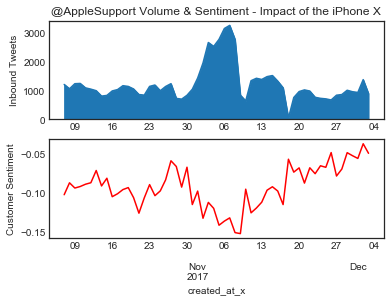

In [33]:
plt.subplot(2, 1, 1)

ax = apple_tweets \
    .groupby(pd.TimeGrouper(key='created_at_x', freq='24h')) \
    .count() \
    .author_id_x.sort_index() \
    .plot(title='@AppleSupport Volume & Sentiment - Impact of the iPhone X', kind='area')
ax.set_ylabel('Inbound Tweets')
    

plt.subplot(2, 1, 2)
ax = apple_tweets \
    .groupby(pd.TimeGrouper(key='created_at_x', freq='24h')) \
    .sentiment.mean() \
    .sort_index() \
    .plot(color='red')
ax.set_ylabel('Customer Sentiment')

* Above graph shows tweet after release of iphone X.
* Tweets regarding the iphone X could largely impact the positivity or negativity of the company.

### 3.Text Processing

* At this point we use the typical techniques of Natural Language Processing to take full advantage of the texts.

#### 3.1 Lower case

* To convert all uppercase letters to lowercase.

In [34]:
def remove_uppercase(text):
    text_lowercase = ' '.join(x.lower() for x in text.split())# It will discard all uppercases
    return text_lowercase

In [35]:
inbOutb['text_x_clean'] = inbOutb['text_x'].apply(lambda x: remove_uppercase(x))
inbOutb['text_y_clean'] = inbOutb['text_y'].apply(lambda x: remove_uppercase(x))
inbOutb['author_id_y'] = inbOutb['author_id_y'].apply(lambda x: remove_uppercase(x)) 

In [36]:
inbOutb.head(2)

,author_id_x,created_at_x,text_x,author_id_y,created_at_y,text_y,sentiment,text_x_clean,text_y_clean
299536,378651,2017-10-13 20:18:30,@117249 @tesco do either of you sell sake? I'm...,tesco,Fri Oct 13 21:26:20 +0000 2017,"@378651 Hi Skye, if you's like to DM me your p...",0.0000,@117249 @tesco do either of you sell sake? i'm...,"@378651 hi skye, if you's like to dm me your p..."
402609,459294,2017-11-02 17:31:45,@O2 really disappointed with lack of support. ...,o2,Thu Nov 02 18:26:10 +0000 2017,"@459294 Hi Daniel, 😞 Please can you DM us some...",-0.0679,@o2 really disappointed with lack of support. ...,"@459294 hi daniel, 😞 please can you dm us some..."


#### 3.2 Remove puntuactions

* Punctuation can provide grammatical context to a sentence which supports our understanding. But for our vectorizer which counts the number of words and not the context, it does not add value, so we remove all special characters.

In [37]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [38]:
#Function to remove Punctuation
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])# It will discard all punctuations
    return text_nopunct

In [39]:
inbOutb['text_x_clean'] = inbOutb['text_x_clean'].apply(lambda x: remove_punct(x))
inbOutb['text_y_clean'] = inbOutb['text_y_clean'].apply(lambda x: remove_punct(x))

In [40]:
inbOutb.head(2)

,author_id_x,created_at_x,text_x,author_id_y,created_at_y,text_y,sentiment,text_x_clean,text_y_clean
299536,378651,2017-10-13 20:18:30,@117249 @tesco do either of you sell sake? I'm...,tesco,Fri Oct 13 21:26:20 +0000 2017,"@378651 Hi Skye, if you's like to DM me your p...",0.0000,117249 tesco do either of you sell sake im wan...,378651 hi skye if yous like to dm me your post...
402609,459294,2017-11-02 17:31:45,@O2 really disappointed with lack of support. ...,o2,Thu Nov 02 18:26:10 +0000 2017,"@459294 Hi Daniel, 😞 Please can you DM us some...",-0.0679,o2 really disappointed with lack of support wo...,459294 hi daniel 😞 please can you dm us some m...


#### 3.3 Removing Usernames

In [41]:
companies = inbOutb['author_id_y'].unique()
inbOutb['text_x_clean'] = inbOutb['text_x_clean'].str.replace('\d+', '')
inbOutb['text_y_clean'] = inbOutb['text_y_clean'].str.replace('\d+', '')

In [42]:
inbOutb['text_x_clean'] = inbOutb['text_x_clean'].str.replace('|'.join(companies), '')
inbOutb['text_y_clean'] = inbOutb['text_y_clean'].str.replace('|'.join(companies), '')
inbOutb.head(2)

,author_id_x,created_at_x,text_x,author_id_y,created_at_y,text_y,sentiment,text_x_clean,text_y_clean
299536,378651,2017-10-13 20:18:30,@117249 @tesco do either of you sell sake? I'm...,tesco,Fri Oct 13 21:26:20 +0000 2017,"@378651 Hi Skye, if you's like to DM me your p...",0.0000,do either of you sell sake im wanting some a...,hi skye if yous like to dm me your postcode i...
402609,459294,2017-11-02 17:31:45,@O2 really disappointed with lack of support. ...,o2,Thu Nov 02 18:26:10 +0000 2017,"@459294 Hi Daniel, 😞 Please can you DM us some...",-0.0679,o really disappointed with lack of support wou...,hi daniel 😞 please can you dm us some more de...


#### 3.4 Checking for most freqen words and removing them

In [43]:
# common worlds

freqX = pd.Series(' '.join(inbOutb['text_x_clean']).split()).value_counts()[:10]
freqY = pd.Series(' '.join(inbOutb['text_y_clean']).split()).value_counts()[:10]
print('FREQ X: \n',freqX,'\nFREQ Y: \n', freqY)

FREQ X: 
 to     450771
i      402429
the    394086
my     310607
a      289704
and    250549
is     210765
for    199934
on     184365
you    172960
dtype: int64 
FREQ Y: 
 to      597010
you     562841
the     438571
your    355927
we      300935
us      281678
for     280735
can     262541
a       257072
this    245768
dtype: int64


* Having those words doesn't add value to the dataset. So we drop them

In [44]:
#removing them
freqX = list(freqX.index)
freqY = list(freqY.index)
inbOutb['text_x_clean'] = inbOutb['text_x_clean'].apply(lambda x: " ".join(x for x in x.split() if x not in freqX))
inbOutb['text_y_clean'] = inbOutb['text_y_clean'].apply(lambda x: " ".join(x for x in x.split() if x not in freqY))

#### 3.5 Checking the rare words and drop them

In [45]:
rareX = pd.Series(' '.join(inbOutb['text_x_clean']).split()).value_counts()[-100:]
rareY = pd.Series(' '.join(inbOutb['text_y_clean']).split()).value_counts()[-100:]

In [46]:
#removing them
rareX = list(rareX.index)
rareY = list(rareY.index)
inbOutb['text_x_clean'] = inbOutb['text_x_clean'].apply(lambda x: " ".join(x for x in x.split() if x not in rareX))
inbOutb['text_y_clean'] = inbOutb['text_y_clean'].apply(lambda x: " ".join(x for x in x.split() if x not in rareY))

#### 3.6 Tokenizing

* Tokenizing separates text into units such as sentences or words. It gives structure to previously unstructured text.

In [47]:
import re

# Function to Tokenize words
def tokenize(text):
    tokens = re.split('\W+', text) #W+ means that either a word character (A-Za-z0-9_) or a dash (-) can go there.
    return tokens

In [48]:
inbOutb['text_x_tokenized'] = inbOutb['text_x_clean'].apply(lambda x: tokenize(x.lower())) 
inbOutb['text_y_tokenized'] = inbOutb['text_y_clean'].apply(lambda x: tokenize(x.lower()))

In [49]:
inbOutb.head(2)

,author_id_x,created_at_x,text_x,author_id_y,created_at_y,text_y,sentiment,text_x_clean,text_y_clean,text_x_tokenized,text_y_tokenized
299536,378651,2017-10-13 20:18:30,@117249 @tesco do either of you sell sake? I'm...,tesco,Fri Oct 13 21:26:20 +0000 2017,"@378651 Hi Skye, if you's like to DM me your p...",0.0000,do either of sell sake im wanting some both of...,hi skye if yous like dm me postcode i check lo...,"[do, either, of, sell, sake, im, wanting, some...","[hi, skye, if, yous, like, dm, me, postcode, i..."
402609,459294,2017-11-02 17:31:45,@O2 really disappointed with lack of support. ...,o2,Thu Nov 02 18:26:10 +0000 2017,"@459294 Hi Daniel, 😞 Please can you DM us some...",-0.0679,o really disappointed with lack of support wou...,hi daniel 😞 please dm some more details about ...,"[o, really, disappointed, with, lack, of, supp...","[hi, daniel, please, dm, some, more, details, ..."


#### 3.7 Stopwords

* Stopwords are common words that will likely appear in any text. They don’t tell us much about our data so we remove them. eg: is, the

In [50]:
import nltk

stopword = nltk.corpus.stopwords.words('english') # All English Stopwords

# Function to remove Stopwords
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]# To remove all stopwords
    return text

inbOutb['text_x_tokenized'] = inbOutb['text_x_tokenized'].apply(lambda x: remove_stopwords(x))
inbOutb['text_y_tokenized'] = inbOutb['text_y_tokenized'].apply(lambda x: remove_stopwords(x))

In [51]:
inbOutb.head(2)

,author_id_x,created_at_x,text_x,author_id_y,created_at_y,text_y,sentiment,text_x_clean,text_y_clean,text_x_tokenized,text_y_tokenized
299536,378651,2017-10-13 20:18:30,@117249 @tesco do either of you sell sake? I'm...,tesco,Fri Oct 13 21:26:20 +0000 2017,"@378651 Hi Skye, if you's like to DM me your p...",0.0000,do either of sell sake im wanting some both of...,hi skye if yous like dm me postcode i check lo...,"[either, sell, sake, im, wanting, closest]","[hi, skye, yous, like, dm, postcode, check, lo..."
402609,459294,2017-11-02 17:31:45,@O2 really disappointed with lack of support. ...,o2,Thu Nov 02 18:26:10 +0000 2017,"@459294 Hi Daniel, 😞 Please can you DM us some...",-0.0679,o really disappointed with lack of support wou...,hi daniel 😞 please dm some more details about ...,"[really, disappointed, lack, support, would, r...","[hi, daniel, please, dm, details, whats, happe..."


#### 3.8 Stemming

* Stemming helps reduce a word to its stem form. It often makes sense to treat related words in the same way. It removes suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach.
* It reduces the corpus of words but often the actual words get neglected. eg: Entitling,Entitled->Entitl

#### 3.9 Lemmatizing

* Lemmatizing derives the canonical form (‘lemma’) of a word. i.e the root form. It is better than stemming as it uses a dictionary-based approach i.e a morphological analysis to the root word.eg: Entitling, Entitled->Entitle

In [52]:
wn = nltk.WordNetLemmatizer()

def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

In [53]:
inbOutb['text_x_lemmatized'] = inbOutb['text_x_tokenized'].apply(lambda x: lemmatizing(x))
inbOutb['text_y_lemmatized'] = inbOutb['text_y_tokenized'].apply(lambda x: lemmatizing(x))
inbOutb.head(2)

,author_id_x,created_at_x,text_x,author_id_y,created_at_y,text_y,sentiment,text_x_clean,text_y_clean,text_x_tokenized,text_y_tokenized,text_x_lemmatized,text_y_lemmatized
299536,378651,2017-10-13 20:18:30,@117249 @tesco do either of you sell sake? I'm...,tesco,Fri Oct 13 21:26:20 +0000 2017,"@378651 Hi Skye, if you's like to DM me your p...",0.0000,do either of sell sake im wanting some both of...,hi skye if yous like dm me postcode i check lo...,"[either, sell, sake, im, wanting, closest]","[hi, skye, yous, like, dm, postcode, check, lo...","[either, sell, sake, im, wanting, closest]","[hi, skye, yous, like, dm, postcode, check, lo..."
402609,459294,2017-11-02 17:31:45,@O2 really disappointed with lack of support. ...,o2,Thu Nov 02 18:26:10 +0000 2017,"@459294 Hi Daniel, 😞 Please can you DM us some...",-0.0679,o really disappointed with lack of support wou...,hi daniel 😞 please dm some more details about ...,"[really, disappointed, lack, support, would, r...","[hi, daniel, please, dm, details, whats, happe...","[really, disappointed, lack, support, would, r...","[hi, daniel, please, dm, detail, whats, happen..."


In [54]:
inbOutb.shape

(794299, 13)

In [55]:
# inbOutb.to_csv('inbOutb.csv')

In [56]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

In [57]:
inbOutb['text_x_lemmatized']=[" ".join(review) for review in inbOutb['text_x_lemmatized'].values]

### 4.Feature Extraction & Model building

In [58]:
%%time
vec = TfidfVectorizer()
vec.fit(inbOutb.text_x_lemmatized.values)
features = vec.transform(inbOutb.text_x_lemmatized.values)

Wall time: 23 s


### KMeans Clustering

In [59]:
%%time
true_k = 7
model = KMeans(n_clusters=true_k, init='k-means++', n_jobs=2, max_iter=10, n_init=1)
model.fit(features)

Wall time: 4min 18s


In [60]:
%%time
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 service
 flight
 get
 customer
 one
 account
 thanks
 im
 day
 like
Cluster 1:
 driver
 ubersupport
 uber
 ride
 charged
 trip
 lyft
 get
 car
 app
Cluster 2:
 time
 every
 get
 service
 first
 flight
 customer
 day
 last
 hour
Cluster 3:
 back
 train
 get
 swhelp
 money
 service
 please
 london
 cancelled
 call
Cluster 4:
 phone
 update
 iphone
 io
 fix
 new
 bery
 since
 updated
 app
Cluster 5:
 order
 delivery
 day
 delivered
 package
 prime
 amazon
 today
 ordered
 still
Cluster 6:
 help
 please
 need
 dm
 account
 hi
 get
 check
 cant
 email
Wall time: 4.83 s


* Cluster 0 : This is baout flight and services and complients. This may be of any airways.
* Cluster 4 : This is about iPhone reviews.

With the increase number of cluster we can get more precise clustering.

#### Evaluation

* Evaluation for unsupervised learning algorithms is a bit difficult and requires human judgement.
* If we don’t have labels for your dataset, then you can still evaluate your clustering model with some metrics. One of them is Silhouette Coefficient.
* The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(features, labels=model.predict(features))

* I got Model accuracy score of 0.65%. This can be further increased by increase number of clusters. 
* Model predictions take lot of time. This can be reduced by redcuing number of features.